In [2]:
import os
os.chdir('/home/etaylor/code_projects/thesis')

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from src.data_preparation import sharpness_assessment
from src.data_preparation import patch_cutter

In [4]:
import os
print(os.getcwd())

/sise/home/etaylor/code_projects/thesis


## Subjective Evaluation
This subjective evaluation involves human observers rating the level of blur in images. 
Although this method is not scalable or precise, it provides valuable insights into human perception, which is ultimately the benchmark for many applications.
In this section i would asses the sharpness assesing algorithms by observing for a sample of images.
I will try to understand which of those methods would be best to asses the blur in the patches in order to perform a better filtering mechansim

In [5]:
import pandas as pd
import config


csv_path = config.GOOD_QUALITY_IMAGES_CSV

# Load the CSV file
df = pd.read_csv(csv_path)

grouped = df.groupby('week_number')
sampled_images = {}

for week, group in grouped:
    if len(group) > 10:
        sampled = group.sample(10, random_state=1)  # Use a fixed random state for reproducibility
    else:
        # If there are not enough images, take all available
        sampled = group
    sampled_images[week] = sampled['image_number'].tolist()

# sampled_images now contains 10 randomly sampled images for each week
for week in sampled_images:
    print(f"Week {week}: {sampled_images[week]}")

Week 5: ['IMG_0058', 'IMG_0071', 'IMG_0033', 'IMG_0061', 'IMG_0044', 'IMG_0062', 'IMG_9985', 'IMG_0014', 'IMG_9982', 'IMG_0072']
Week 6: ['IMG_0614', 'IMG_0642', 'IMG_0543', 'IMG_0581', 'IMG_0545', 'IMG_0599', 'IMG_0583', 'IMG_0609', 'IMG_0584', 'IMG_0582']
Week 7: ['IMG_1143', 'IMG_1178', 'IMG_1190', 'IMG_1206', 'IMG_1084', 'IMG_1085', 'IMG_1196', 'IMG_1145', 'IMG_1201', 'IMG_1160']
Week 8: ['IMG_1834', 'IMG_1753', 'IMG_1776', 'IMG_1849', 'IMG_1778', 'IMG_1867', 'IMG_1769', 'IMG_1838', 'IMG_1800', 'IMG_1868']
Week 9: ['IMG_2151', 'IMG_2191', 'IMG_2239', 'IMG_2157', 'IMG_2304', 'IMG_2117', 'IMG_2148', 'IMG_2210', 'IMG_2209', 'IMG_2217']


In [8]:
def process_and_plot_image(image_path, sharpness_function):
    image = cv2.imread(image_path)
    patches_with_coords = patch_cutter.cut_images(image)
    
    # Number of patches along each dimension
    num_patches_side = int(np.sqrt(len(patches_with_coords)))
    
    _, axes = plt.subplots(num_patches_side, num_patches_side, figsize=(15, 15))
    for i in range(num_patches_side):
        for j in range(num_patches_side):
            ax = axes[i, j]
            patch_index = i * num_patches_side + j
            patch = patches_with_coords[patch_index][0]
    
            sharpness_value = sharpness_function(patch)
            # Convert the patch from BGR to RGB if it's a color image
            if patch.ndim == 3 and patch.shape[2] == 3:
                patch = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
            
            ax.imshow(patch, cmap='gray' if patch.ndim == 2 else None)
            ax.axis('off')
            ax.set_title(f"Sharpness: {sharpness_value:.2f}")
    
    plt.tight_layout()
    plt.show()
    
    
def compare_sharpness_methods(image_path):
    print("------------------ Gradient-based sharpness ------------------ ")
    process_and_plot_image(image_path, sharpness_assessment.calculate_gradient_based_sharpness)
    print("------------------ Laplacian-based sharpness ------------------ ")
    process_and_plot_image(image_path, sharpness_assessment.laplacian_sharpness)
    print("------------------ Edge-based sharpness ------------------ ")
    process_and_plot_image(image_path, sharpness_assessment.edge_sharpness)
    print("------------------ Tenengrad-based sharpness ------------------ ")
    process_and_plot_image(image_path, sharpness_assessment.tenengrad_sharpness)
    print("------------------ Fast Fourier Transform sharpness ------------------ ")
    process_and_plot_image(image_path, sharpness_assessment.fft_sharpness)
    print("------------------ Contrast sharpness ------------------ ")
    process_and_plot_image(image_path, sharpness_assessment.contrast_sharpness)

Processing week 5 with 10 images
Comparing sharpness methods for image IMG_0058 of week 5
------------------ Gradient-based sharpness ------------------ 


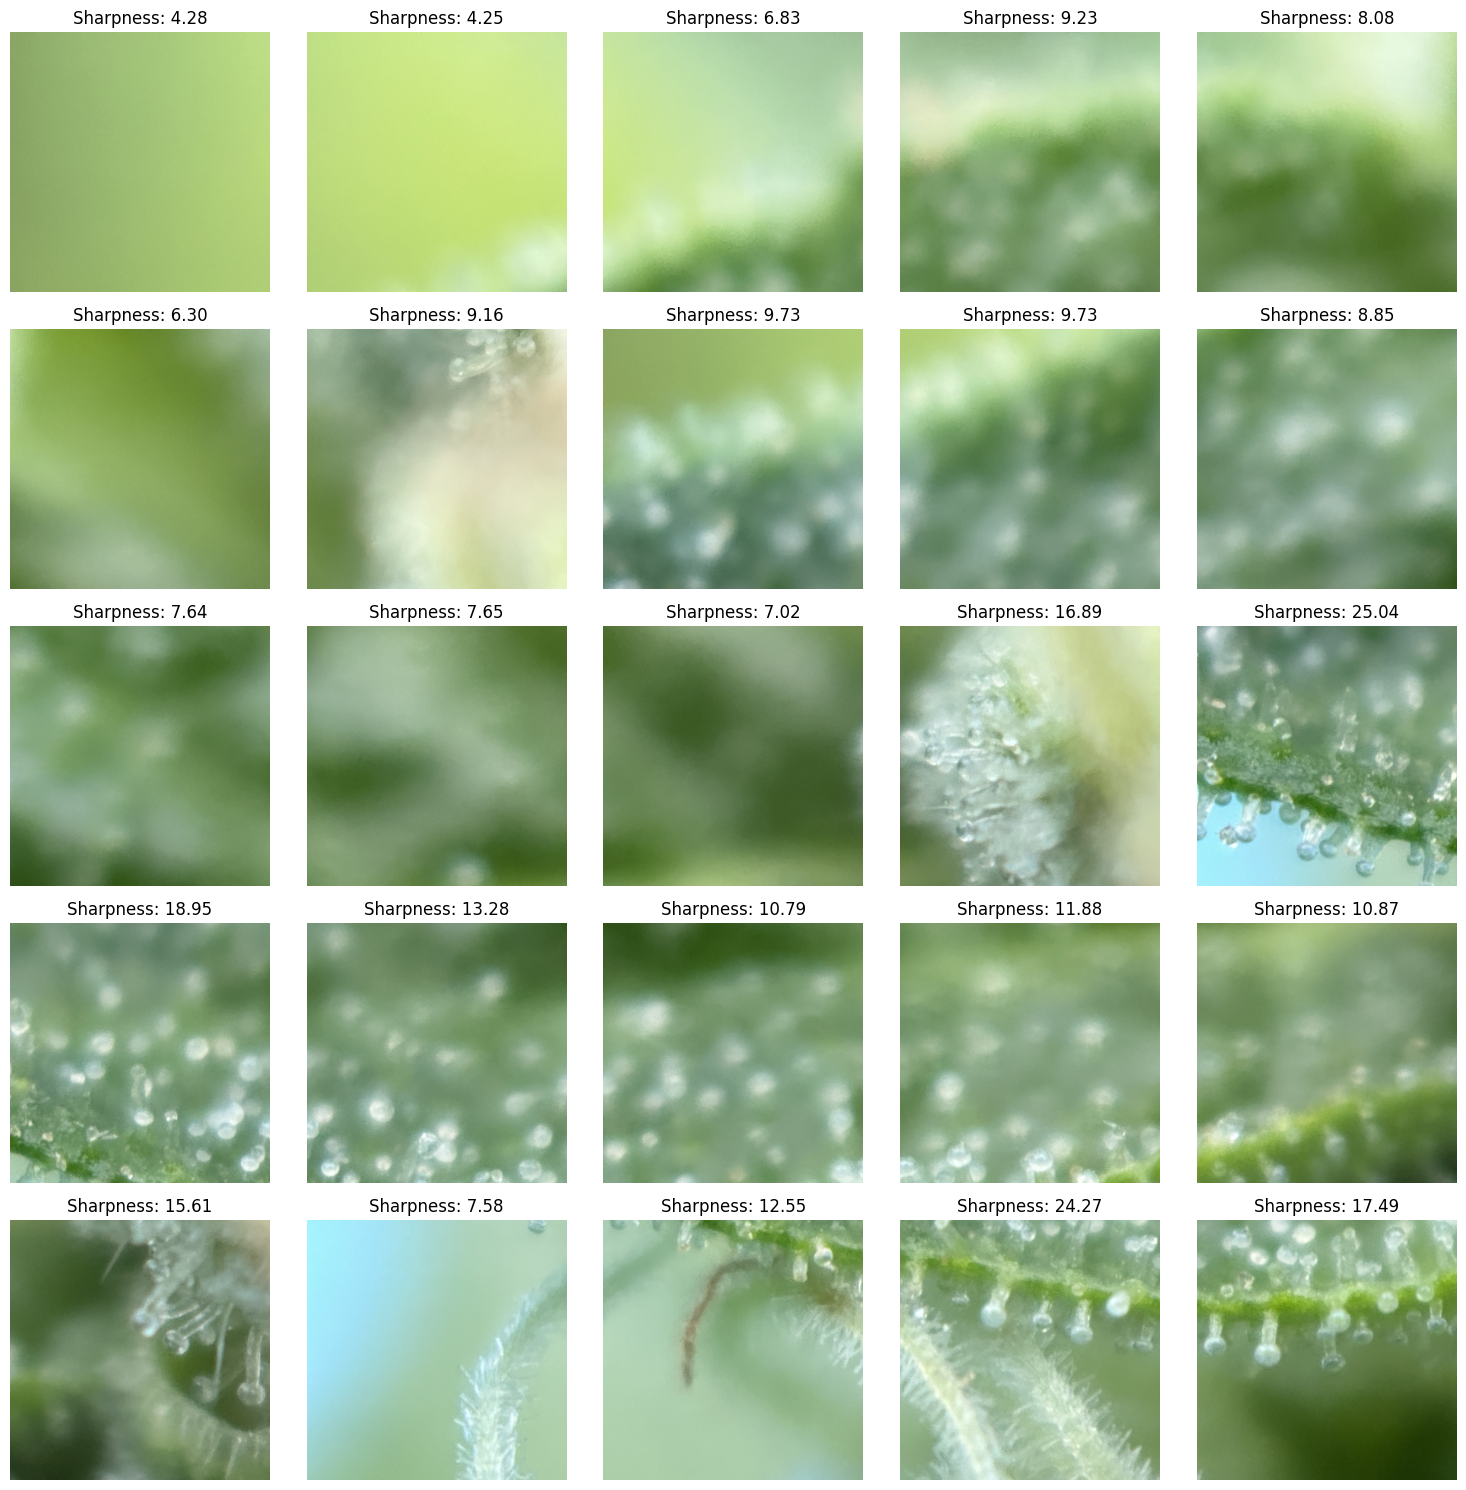

------------------ Laplacian-based sharpness ------------------ 


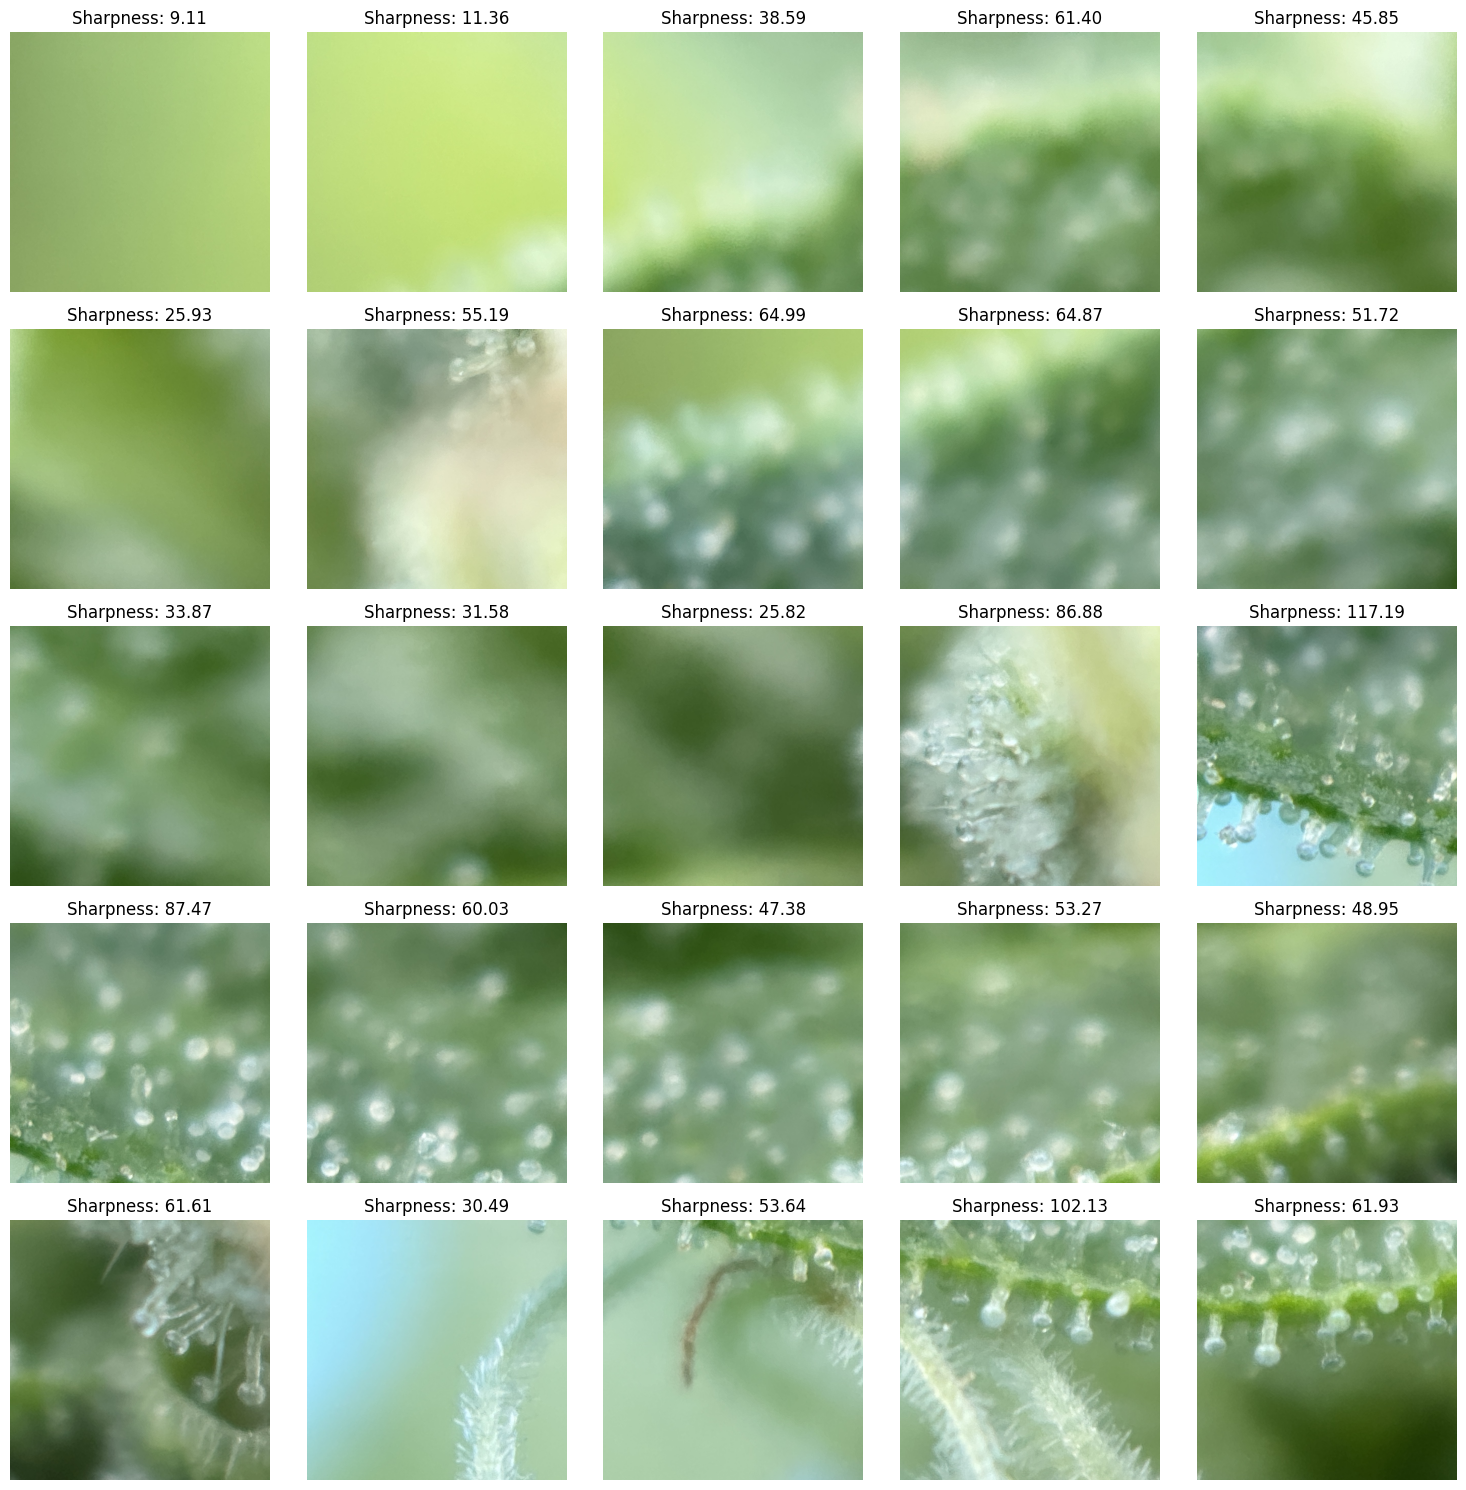

------------------ Edge-based sharpness ------------------ 


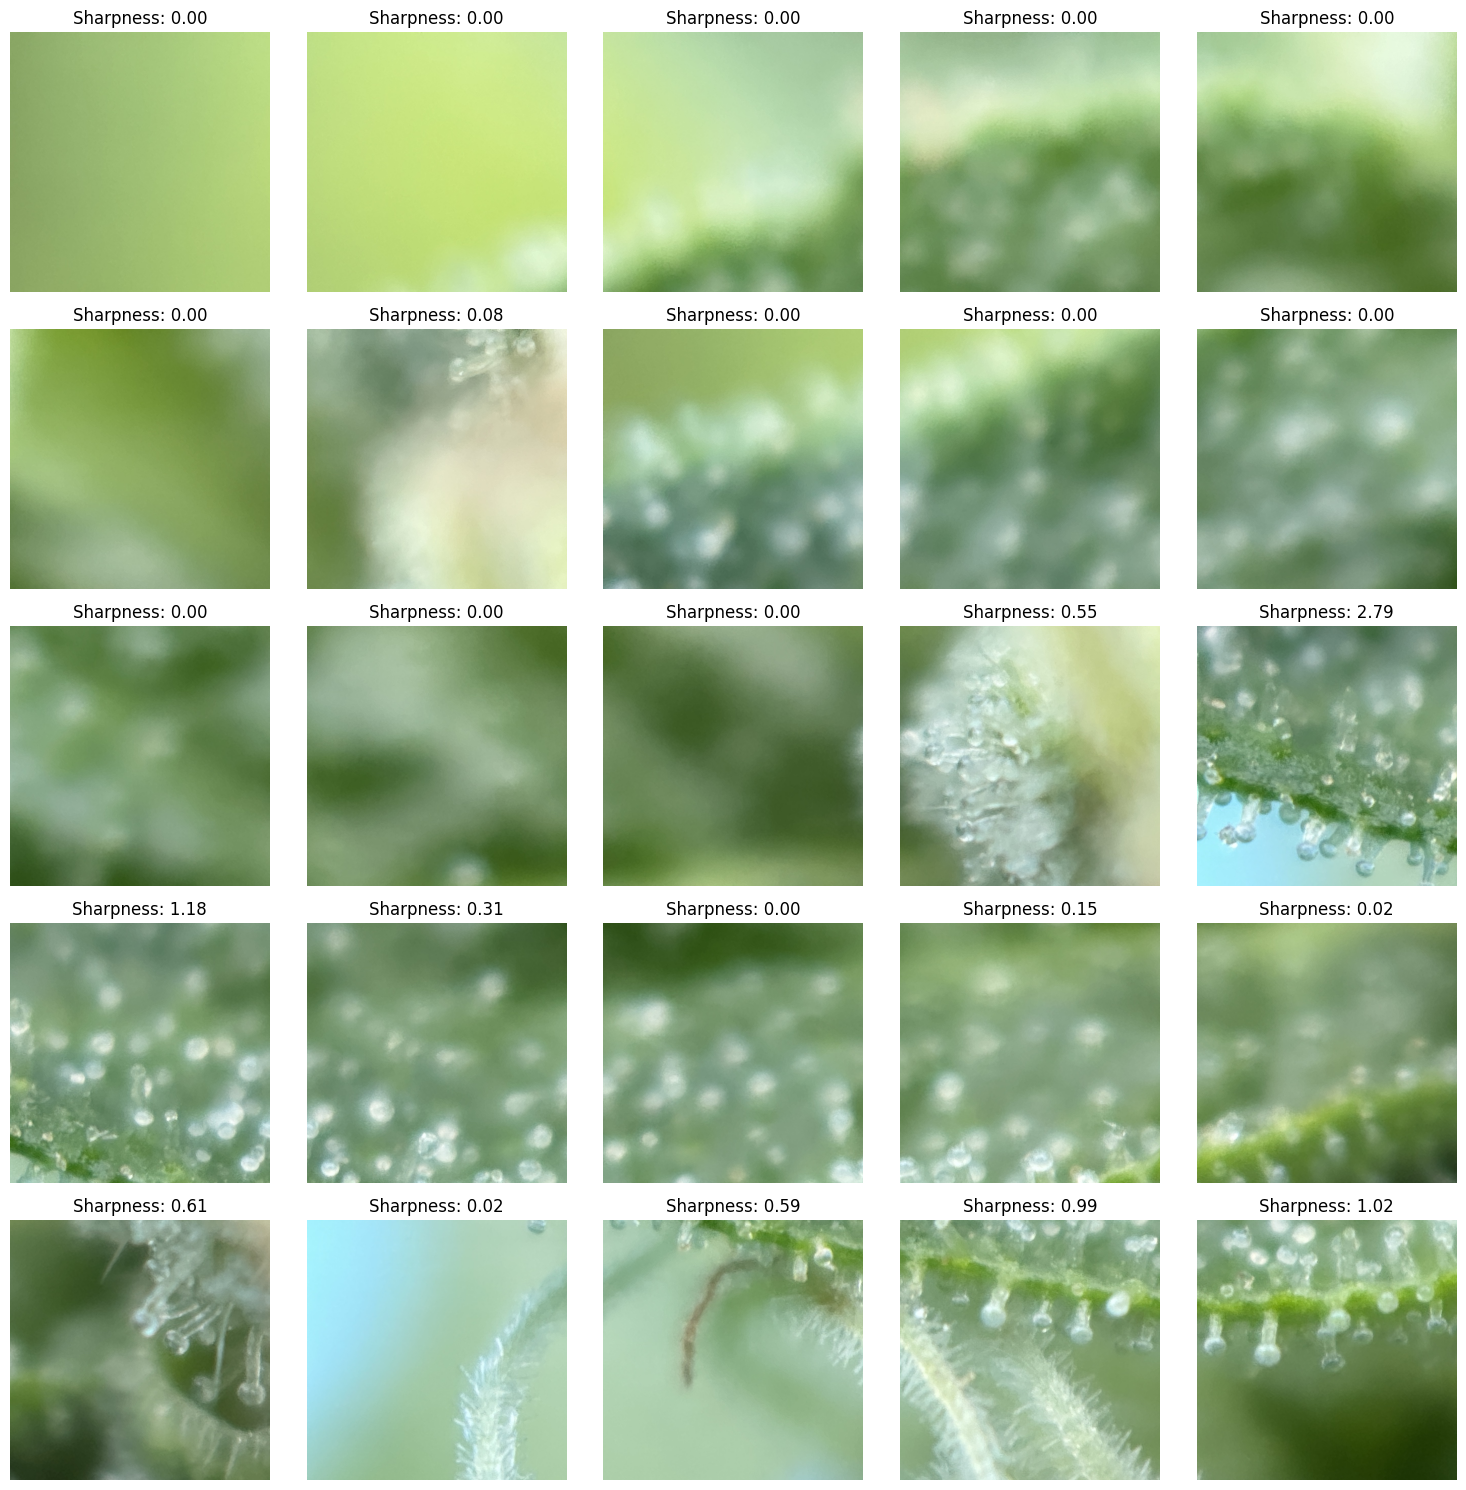

------------------ Tenengrad-based sharpness ------------------ 


In [9]:
for week, images in sampled_images.items():
    print(f"Processing week {week} with {len(images)} images")
    for image_number in images:
        # Retrieve the path for each image
        image_path = config.get_image_path(image_number)
        
        if image_path:
            print(f"Comparing sharpness methods for image {image_number} of week {week}")
            # Compare sharpness methods for the current image
            compare_sharpness_methods(image_path)
        else:
            print(f"Could not find path for image {image_number}")